<a href="https://colab.research.google.com/github/hsy19y/-/blob/main/%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_7%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_0417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
##데이터셋 로드
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##4-1 가중치 초기화

1. he_uniform : 활성화 함수가 ReLU 인 경우 사용
2. glorot_uniform : 활성화 함수가 Sigmoid, Tahn 인 경우 사용

In [26]:
##kernel_initializer = 'uniform'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'uniform', activation = 'relu')

In [27]:
##kernel_initializer = 'normal'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'normal', activation = 'relu')

In [28]:
##kernel_initializer = 'he_normal'
dense = tf.keras.layers.Dense(256, kernel_initializer = 'he_normal', activation = 'relu')

In [29]:
##가중치를 적용하지 않은 경우
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(64, activation = 'relu'),
                             tf.keras.layers.Dense(32, activation = 'relu'),
                             tf.keras.layers.Dense(10, activation = 'softmax')])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 64)                50240     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6855 - accuracy: 0.8064 - val_loss: 0.4730 - val_accuracy: 0.8910
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3480 - accuracy: 0.9091 - val_loss: 0.2997 - val_accuracy: 0.9292
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2373 - accuracy: 0.9345 - val_loss: 0.2289 - val_accuracy: 0.9388
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1937 - accuracy: 0.9451 - val_loss: 0.2153 - val_accuracy: 0.9432
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1623 - accuracy: 0.9536 - val_loss: 0.1718 - val_accuracy: 0.9540
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1458 - accuracy: 0.9584 - val_loss: 0.1937 - val_accuracy: 0.9509
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1350 - accuracy: 0.9603 - val_loss: 0.1716 - val_accuracy:

In [31]:
####kernel_initializer = 'he_normal' 을 적용한 경우
model_w_he = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                  tf.keras.layers.Dense(64, kernel_initializer = 'he_normal', activation = 'relu'),
                                  tf.keras.layers.Dense(32, activation = 'relu'),
                                  tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_he.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_w_he.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history_w_he = model_w_he.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7655 - accuracy: 0.7683 - val_loss: 0.5498 - val_accuracy: 0.8682
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4283 - accuracy: 0.8861 - val_loss: 0.3376 - val_accuracy: 0.9098
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2880 - accuracy: 0.9216 - val_loss: 0.2677 - val_accuracy: 0.9283
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2247 - accuracy: 0.9390 - val_loss: 0.2205 - val_accuracy: 0.9441
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1827 - accuracy: 0.9490 - val_loss: 0.2077 - val_accuracy: 0.9471
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1591 - accuracy: 0.9562 - val_loss: 0.2076 - val_accuracy: 0.9474
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1475 - accuracy: 0.9604 - val_loss: 0.1578 - val_accuracy:

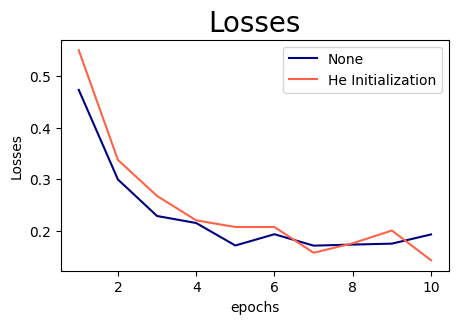

In [36]:
##두 모델 비교 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

In [34]:
####kernel_initializer = 'glorot_normal' 을 적용한 경우
model_w_gl = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                  tf.keras.layers.Dense(64, kernel_initializer = 'glorot_normal', activation = 'sigmoid'),
                                  tf.keras.layers.Dense(32, activation = 'sigmoid'),
                                  tf.keras.layers.Dense(10, activation = 'softmax')])
model_w_gl.summary()  

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 dense_38 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_w_gl.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history_w_gl = model_w_gl.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7751 - accuracy: 0.8081 - val_loss: 0.4202 - val_accuracy: 0.8838
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3954 - accuracy: 0.8833 - val_loss: 0.3515 - val_accuracy: 0.8958
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8932 - val_loss: 0.3462 - val_accuracy: 0.8968
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3367 - accuracy: 0.8983 - val_loss: 0.3249 - val_accuracy: 0.9011
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.9027 - val_loss: 0.3147 - val_accuracy: 0.9053
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3096 - accuracy: 0.9038 - val_loss: 0.2682 - val_accuracy: 0.9212
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2920 - accuracy: 0.9115 - val_loss: 0.2767 - val_accuracy:

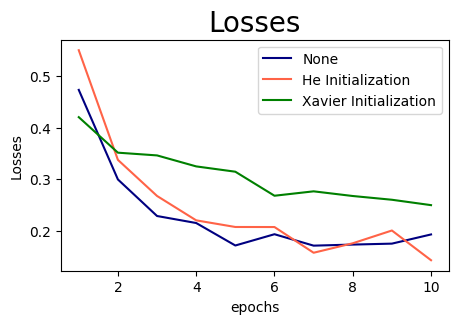

In [37]:
##세 모델 시각화
plt.figure(figsize = (5,3))
plt.plot(np.arange(1,11),history.history['val_loss'], color = 'navy', label = 'None')
plt.plot(np.arange(1,11),history_w_he.history['val_loss'], color = 'tomato', label = 'He Initialization')
plt.plot(np.arange(1,11),history_w_gl.history['val_loss'], color = 'green', label = 'Xavier Initialization')
plt.title("Losses", fontsize = 20)
plt.xlabel('epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

##4-2 규제(Regularization)

1. L1 : 가중치의 절대값에 비례하여 (0.001을 곱하여) 비용 추가
2. L2 : 가중치의 제곱에 비례하여 (0.001을 곱하여) 비용 추가

In [25]:
regularizer2 = tf.keras.regularizers.l2(0.001)
L2_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, kernel_initializer ='normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(32, kernel_initializer ='normal', kernel_regularizer = regularizer2, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [22]:
L2_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
L2_model = L2_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7153 - accuracy: 0.8579 - val_loss: 0.3322 - val_accuracy: 0.9292
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2923 - accuracy: 0.9384 - val_loss: 0.2696 - val_accuracy: 0.9454
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2400 - accuracy: 0.9503 - val_loss: 0.2151 - val_accuracy: 0.9568
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2148 - accuracy: 0.9569 - val_loss: 0.2154 - val_accuracy: 0.9571
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1955 - accuracy: 0.9609 - val_loss: 0.2198 - val_accuracy: 0.9551
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1941 - accuracy: 0.9618 - val_loss: 0.1981 - val_accuracy: 0.9612
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1840 - accuracy: 0.9656 - val_loss: 0.2122 - val_accuracy:

In [ ]:
##he_nomal initialization + L1(0.01) + Relu
model_drop_reg = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                                      tf.keras.layer.Dense(64. kernel_initializer = 'he_normal', kernel_regularizer = 'l1', activation = 'relu')
                                      tf.keras.layer.Dropout(0.5)
                                      tf.keras.layer.Dense(32, kernel_initializer = 'he_normal', kernel_regularizer = 'l1', activation = 'relu')
                                      tf.keras.layer.Dropout(0.5)
                                      tf.keras.layer.Dense(10, activation = 'softmax')
                                      

])